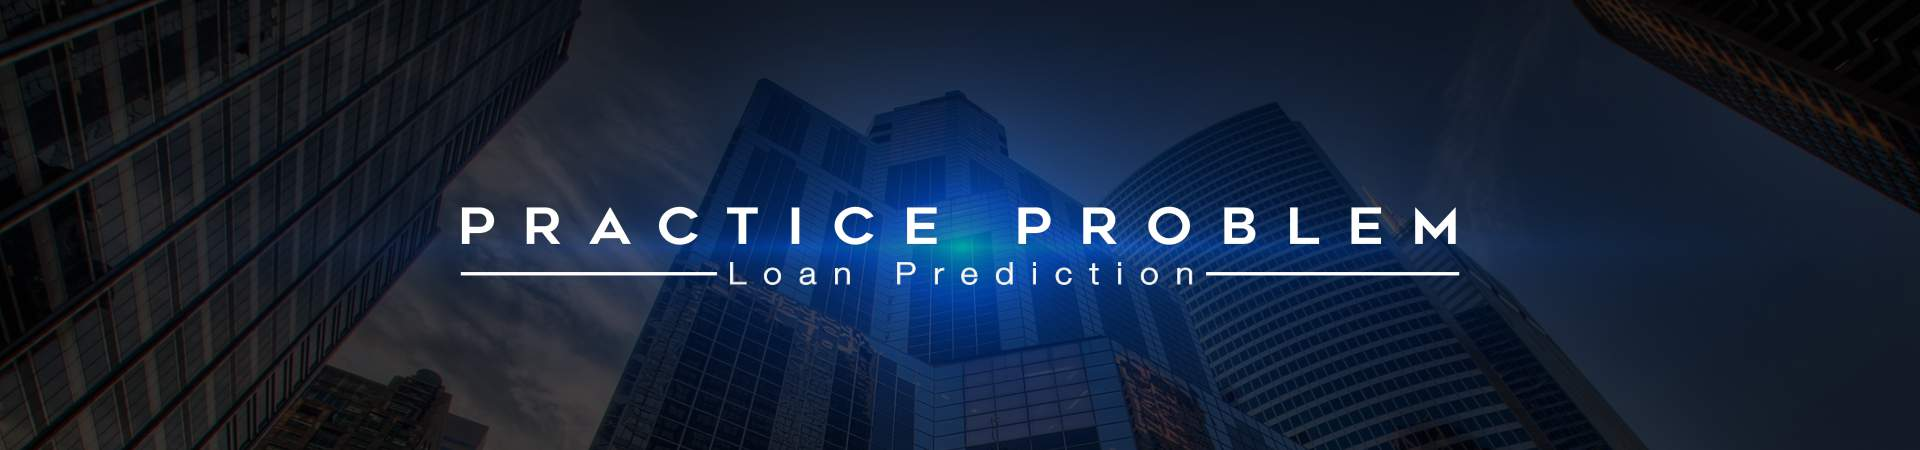

**Dream Housing Finanace Company deals in all house loan, they have presence acreoss all urban, semi urban and rural areas.**

**Customer first apply for home loan after that company validates the customer eligibility for loan.**

**Company wants to automate the loan eligibility process in real time based on detail provided by customer whiling filling the online application.**

**The details provided by customers are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others.**

**To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target the customers.**

**It is a Classification problem where we have to predict whether a loan would be approved or not.**

**Clasification can of two types-**

* 1) Binary Classification:
* 2) Multiclass Classification:

**Factors Affecting the loan Approval:**

* 1) Salary: High Salary Applicant have high changes of loan approval.
* 2) Previous history: Applicant who have repayed their previous debts should have higher chances of loan approval.
* 3) Loan amount: If the loan amount is less, chances of loan approval should be high.
* 4) Loan term: Loan for less time period and less amount have higher chances of loan approval.
* 5) EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

### Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Load Training Data

In [241]:
train=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Data Sets\\Loan Prediction Analytical Vidya\\train_ctrUa4K.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [242]:
test=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Data Sets\\Loan Prediction Analytical Vidya\\test_lAUu6dG.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [249]:
test_original=test

### Data Description

### Data types

In [8]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Shape & Size of data

In [243]:
print("Tain Shape: ", train.shape)
print("Test shape: ", test.shape)

Tain Shape:  (614, 13)
Test shape:  (367, 12)


### Out of 614 Applicantion how many application got approved?

Y    422
N    192
Name: Loan_Status, dtype: int64


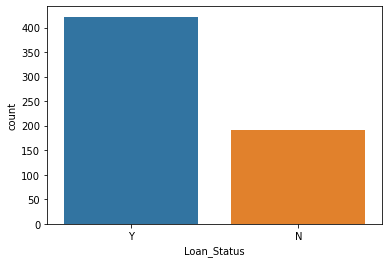

In [14]:
print(train.Loan_Status.value_counts())
sns.countplot(x='Loan_Status', data=train);

Loan has been approved to 422 Applicants.

### How many Male & Female Applicants are their in our data?

Male      489
Female    112
Name: Gender, dtype: int64


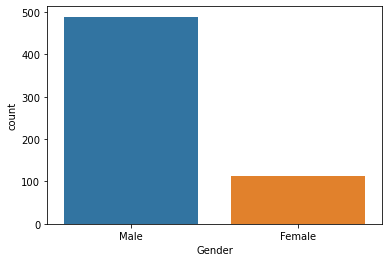

In [16]:
print(train.Gender.value_counts())
sns.countplot(x='Gender', data=train);

489 applicants are Male & 112 applicants are female.

### What is count of married applicant?

Yes    398
No     213
Name: Married, dtype: int64


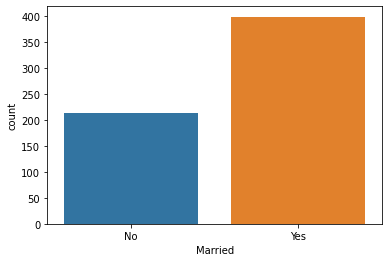

In [17]:
print(train.Married.value_counts())
sns.countplot(x='Married', data=train);

398 applicant are Married, 213 applicant are Un-Married.

### What is the count of Self Employed applicant?

No     500
Yes     82
Name: Self_Employed, dtype: int64


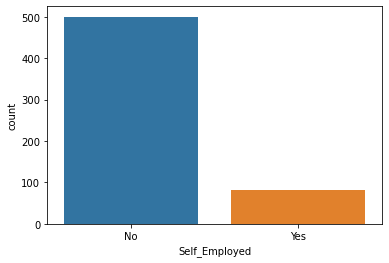

In [19]:
print(train.Self_Employed.value_counts())
sns.countplot(x='Self_Employed', data=train);

Only 82 applicant are self employed.

### How many old applicants who have repayed their debts?

1.0    475
0.0     89
Name: Credit_History, dtype: int64


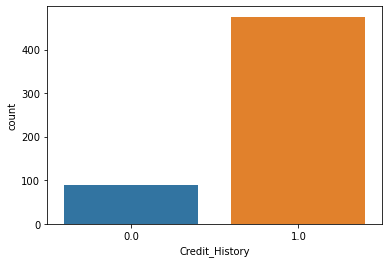

In [20]:
print(train.Credit_History.value_counts())
sns.countplot(x='Credit_History', data=train);

Around 85% repayed their debts.

### How many dependents on Loan Applicant?

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


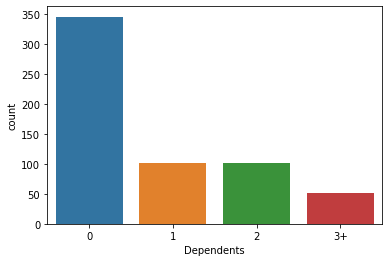

In [23]:
print(train.Dependents.value_counts())
sns.countplot(x='Dependents', data=train);

Most the applicants dont have any dependents.

### What is Education Qualificaation of Applicant?

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


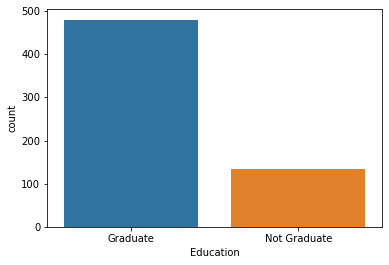

In [24]:
print(train.Education.value_counts())
sns.countplot(x='Education', data=train);

Around 80% Applicants are Graduate.

### Applicant Property Location?

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


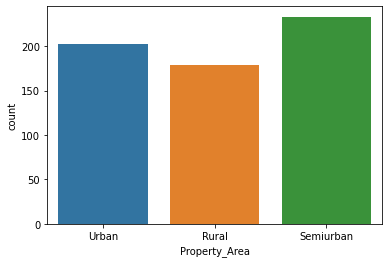

In [27]:
print(train.Property_Area.value_counts())
sns.countplot(x='Property_Area', data=train);

### Applicant Income

Average Income of Applicant 5403.459283387622


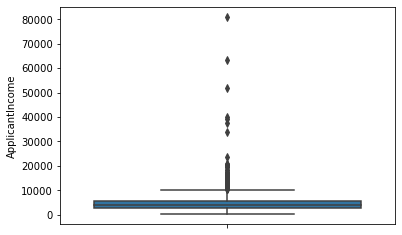

In [32]:
print("Average Income of Applicant", df.ApplicantIncome.mean())
sns.boxplot(y='ApplicantIncome', data=train);

Data contains lot of outliers.

### Distribution of Appplicant Income

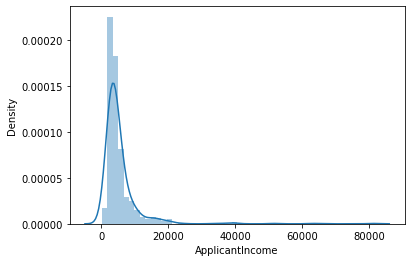

In [36]:
sns.distplot(train['ApplicantIncome']);

Most of the data points lays left side, hence it is left skewed.

### Lets See the Distribustion of Applicant Income with respect to Education

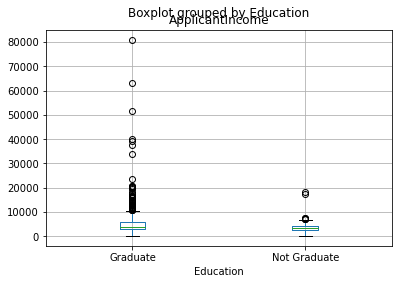

In [42]:
train.boxplot(column='ApplicantIncome',by='Education');

Higher the Gradution higher the Income, hence Graduate has many outliers.

### Co-Applicant Income

Average Income of Co-Applicant 1621.245798027101


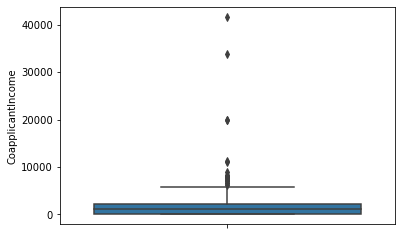

In [49]:
print("Average Income of Co-Applicant", df.CoapplicantIncome.mean())
sns.boxplot(y='CoapplicantIncome', data=train);

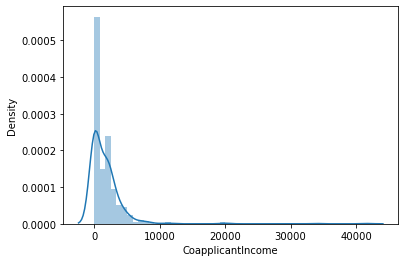

In [46]:
sns.distplot(train['CoapplicantIncome']);

From about we can say that many applicant dont have any income.

### Distribution of Loan Amount

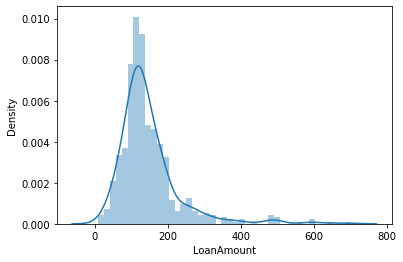

In [47]:
sns.distplot(train['LoanAmount']);

Average Loan Amount 146.41216216216216


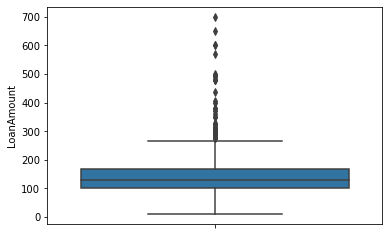

In [48]:
print("Average Loan Amount", df.LoanAmount.mean())
sns.boxplot(y='LoanAmount', data=train);

Distribution seems to be Normal but the column has many outliers.

### How many Male & Female appplicants Loan has been Approved?

In [51]:
pd.crosstab(train['Gender'],train['Loan_Status'])

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


339 Male applicants loan has been approved.

### How Many Married Applicants loan has approved?

In [52]:
pd.crosstab(train['Married'],train['Loan_Status'])

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


285 Married applicants Loan has been Approved.

### Dependents vs Loan Status

In [53]:
pd.crosstab(train['Dependents'],train['Loan_Status'])

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


Higher the dependents lower the changes of loan approval.

### Education vs Loan Status

In [54]:
pd.crosstab(train['Education'],train['Loan_Status'])

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


Gradutes appplicants have more chances of loan approval.

### Employement type vs Loan Status

In [56]:
pd.crosstab(train['Self_Employed'],train['Loan_Status'])

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


Self Employed applicant has low chances of loan approval.

### Credit History vs Loan Status

In [57]:
pd.crosstab(train['Credit_History'],train['Loan_Status'])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


Applicant who had payed their previous debts have most likely to get loan approval.

### Propery Area vs Loan Status

In [58]:
pd.crosstab(train['Property_Area'],train['Loan_Status'])

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


Semi-urban appplicant have high chances of loan approval.

### Applicant Income vs Loan Status

In [60]:
train.groupby('Loan_Status').ApplicantIncome.mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

Here we cannot come to any decision..

lets create bins of Income and then Observe the Loan Status

In [61]:
bins=[0,2500,4000,6000, 81000]
group=['Low','Average','High','Very High']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

In [62]:
pd.crosstab(train['Income_bin'],train['Loan_Status'])

Loan_Status,N,Y
Income_bin,,
Low,34,74
Average,67,159
High,45,98
Very High,46,91


### Co-Applicants Income vs Loan Status

In [63]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['CoapplicantIncome_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
pd.crosstab(train['CoapplicantIncome_bin'],train['Loan_Status'])

Loan_Status,N,Y
CoapplicantIncome_bin,,
Low,3,3
Average,51,120
High,137,297


In [ ]:
train.drop(['Income_bin','CoapplicantIncome_bin'],axis=1,inplace=True)

### Missing values

In [147]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self Employed, Loan Amount, Loan Amount Term & Credit history columns.

**For Numeric Variables impute using mean or median**
**For Categorical Variable impute using mode**

In [244]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [70]:
train.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Loan Amount Term 360 is repeated most of the times hence it is better to impute missing terms with mode.

In [245]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [246]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [250]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [251]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Outliers In LoanAmount Column

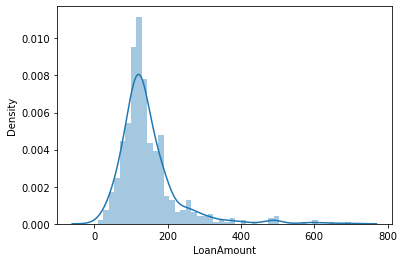

In [75]:
sns.distplot(train['LoanAmount']);

Data is right skewed, make it normal distributed using Transformation Techniques.

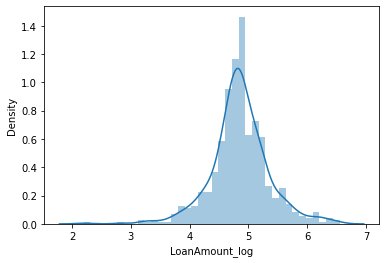

In [247]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
sns.distplot(train['LoanAmount_log']);

Now data is normally distributed.

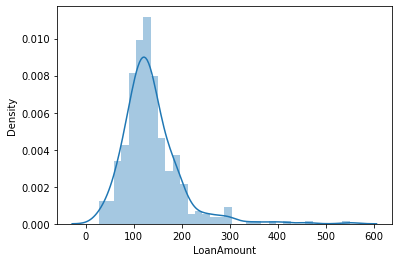

In [82]:
sns.distplot(test['LoanAmount']);

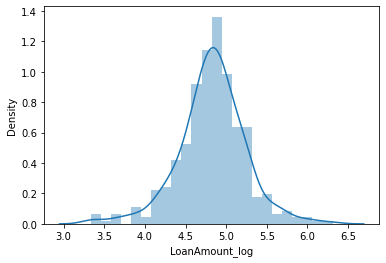

In [252]:
test['LoanAmount_log']=np.log(test['LoanAmount'])
sns.distplot(test['LoanAmount_log']);

Now data is Normaly Distributed.

### Model Building

In [253]:
#column Loan_Id is not iseful is prediction so drop this colum
train.drop('Loan_ID', axis=1,inplace=True)
test.drop('Loan_ID', axis=1,inplace=True)

#### Sepeate Dependent(y), Independent(X) variable

In [254]:
X=train.drop('Loan_Status', axis=1)
y=train.Loan_Status

In [255]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,4.948760


In [256]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

Classification model takes only numeric values as its input so convert all categorical columns to numeric.

In [257]:
X=pd.get_dummies(X)
test=pd.get_dummies(test)

In [258]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


In [259]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,4.700480,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,4.836282,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,5.337538,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,4.605170,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,4.356709,0,1,1,0,...,0,0,0,0,1,1,0,0,0,1


Now our data is ready to use as a input to our model.

#### Split data into into train test

In [260]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30, random_state=0)

#### Create Logistic Model

In [261]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

#### Predict the Loan Status

In [262]:
y_pred=model.predict(x_test)

#### Calculate the Accuracy

In [263]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.827027027027027

**Prediction accuracy is about 83%**

We seperately imported test data on which we wanted to predict the Load Status, Now use that test data and predict the Loan Status

In [264]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,4.700480,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,4.836282,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,5.337538,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,4.605170,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,4.356709,0,1,1,0,...,0,0,0,0,1,1,0,0,0,1


In [265]:
pred_test=model.predict(test)

Our predictions are ready for new Test data.

In [266]:
len(pred_test)

367

In [100]:
submission=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Data Sets\\Loan Prediction Analytical Vidya\\sample_submission_49d68Cx.csv')
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [107]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [138]:
submission['Loan_Status'].replace(0,'N', inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [112]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv', index=False)

### To Improve Accuracy Perform Some Feature Engineering Techniques

Lets Create Total Income Column Which combine the Applicant Income and Coapplicant Income

In [267]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

#### Distribution of Total Income column

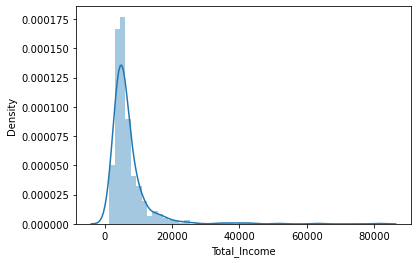

In [268]:
sns.distplot(train['Total_Income']);

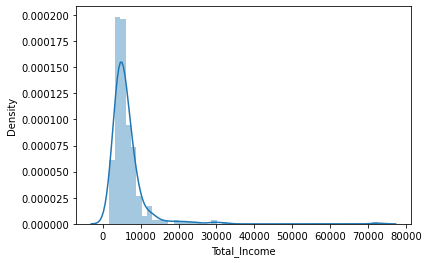

In [269]:
sns.distplot(test['Total_Income']);

Data is shifted towards left hence it is left skewed. Perform Log transformation so that data is normal distribute.

In [270]:
train['Total_Income_log']=np.log(train['Total_Income'])
test['Total_Income_log']=np.log(test['Total_Income'])

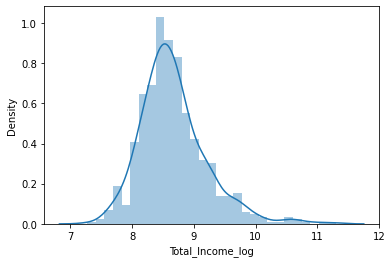

In [271]:
sns.distplot(train['Total_Income_log']);

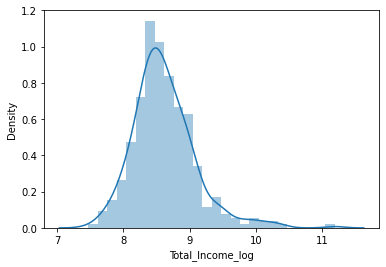

In [272]:
sns.distplot(test['Total_Income_log']);

Now the data is normally distributed.

Now Lets create EMI column which is Loan Amount/Loan Amount Term....

In [273]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

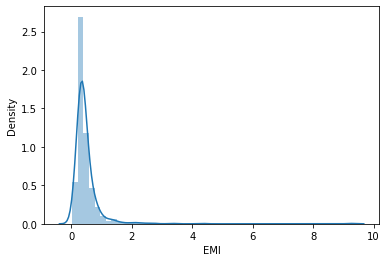

In [274]:
sns.distplot(train['EMI']);

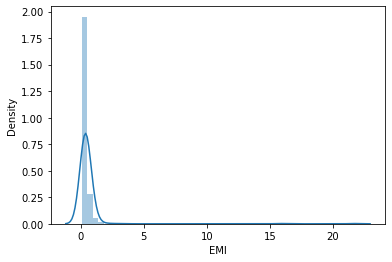

In [275]:
sns.distplot(test['EMI']);

On First sight, data is normally distributed.

Now Lets create Balance Income column from Total income - EMI*1000

In [276]:
train['Balance_Income']=train['Total_Income']-(train['EMI']*100)
test['Balance_Income']=test['Total_Income']-(test['EMI']*100)

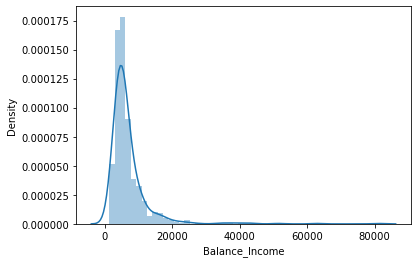

In [277]:
sns.distplot(train['Balance_Income']);

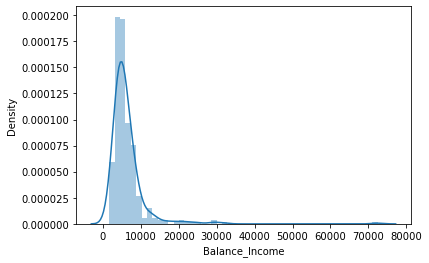

In [278]:
sns.distplot(test['Balance_Income']);

Now drop the Original columns from which we have created new columns.

In [279]:
train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income'],axis=1, inplace=True)
test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income'],axis=1, inplace=True)

In [280]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income_log,EMI,Balance_Income
0,Male,No,0,Graduate,No,1.0,Urban,Y,4.852030,8.674026,0.355556,5813.444444
1,Male,Yes,1,Graduate,No,1.0,Rural,N,4.852030,8.714568,0.355556,6055.444444
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,4.189655,8.006368,0.183333,2981.666667
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,4.787492,8.505323,0.333333,4907.666667
4,Male,No,0,Graduate,No,1.0,Urban,Y,4.948760,8.699515,0.391667,5960.833333


In [281]:
test.head()

,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income_log,EMI,Balance_Income
0,1.0,4.700480,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,8.651724,0.305556,5689.444444
1,1.0,4.836282,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,8.428581,0.350000,4541.000000
2,1.0,5.337538,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,8.824678,0.577778,6742.222222
3,1.0,4.605170,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,8.494129,0.277778,4858.222222
4,1.0,4.356709,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1,8.094378,0.216667,3254.333333


In [283]:
print("Train Shape: ", train.shape)
print("Test shape: ", test.shape)

Train Shape:  (614, 12)
Test shape:  (367, 20)


Now our data is clean and ready to apply as a input to our model.

### Logistic Regression using Statified K-Fold Cross Validation Technique

In [305]:
train.Loan_Status.replace('N',0, inplace=True)
train.Loan_Status.replace('Y',1, inplace=True)

In [306]:
X=train.drop('Loan_Status',axis=1)
y=train.Loan_Status

In [307]:
X=pd.get_dummies(X)
X.shape

(614, 20)

In [308]:
from sklearn.model_selection import StratifiedKFold
i=1
kf=StratifiedKFold(n_splits=5,random_state=0,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    
    model=LogisticRegression(random_state=0)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('Accuracy Score:', score)
    i+=1
    pre_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
Accuracy Score: 0.7967479674796748

2 of kfold 5
Accuracy Score: 0.7642276422764228

3 of kfold 5
Accuracy Score: 0.8048780487804879

4 of kfold 5
Accuracy Score: 0.7967479674796748

5 of kfold 5
Accuracy Score: 0.8278688524590164


In [309]:
np.mean([79.67,76.42,80.48,79.67,82.78])

79.804

**Average Accuracy Score is 80%**

### Decision Tree using Statified K-Fold Cross Validation Technique

In [310]:
from sklearn import tree
i=1
kf=StratifiedKFold(n_splits=5,random_state=0,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    
    model=tree.DecisionTreeClassifier(random_state=0)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('Accuracy Score:', score)
    i+=1
    pre_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
Accuracy Score: 0.7317073170731707

2 of kfold 5
Accuracy Score: 0.6504065040650406

3 of kfold 5
Accuracy Score: 0.6910569105691057

4 of kfold 5
Accuracy Score: 0.6666666666666666

5 of kfold 5
Accuracy Score: 0.7540983606557377


In [311]:
np.mean([73.17,65.04,69.10,66.66,75.40])

69.874

**Average Accuracy score is 70%**

### Random Forest using Statified K-Fold Cross Validation Technique

In [312]:
from sklearn.ensemble import RandomForestClassifier
i=1
kf=StratifiedKFold(n_splits=5,random_state=0,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    
    model=RandomForestClassifier(random_state=0,max_depth=10)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('Accuracy Score:', score)
    i+=1
    pre_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
Accuracy Score: 0.7886178861788617

2 of kfold 5
Accuracy Score: 0.7723577235772358

3 of kfold 5
Accuracy Score: 0.8292682926829268

4 of kfold 5
Accuracy Score: 0.7886178861788617

5 of kfold 5
Accuracy Score: 0.8278688524590164


In [313]:
np.mean([78.86,77.23,82.92,78.86,82.78])

80.13

**Average accuracy score is 80%**

### XGBOOST using Statified K-Fold Cross Validation Technique

In [314]:
from xgboost import XGBClassifier
i=1
kf=StratifiedKFold(n_splits=5,random_state=0,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    
    model=XGBClassifier(n_estimators=50,max_depth=4)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('Accuracy Score:', score)
    i+=1
    pre_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
Accuracy Score: 0.7804878048780488

2 of kfold 5
Accuracy Score: 0.7560975609756098

3 of kfold 5
Accuracy Score: 0.8211382113821138

4 of kfold 5
Accuracy Score: 0.7723577235772358

5 of kfold 5
Accuracy Score: 0.7950819672131147


In [315]:
np.mean([78.08,75.60,82.11,77.23,79.50])

78.504

**If we compare all the models we found that Logistic Regression is Best one which high accuracy of 83%**